In [173]:
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib as mp
import tensorflow as tf

In [174]:
train_data = pd.read_csv("data/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [175]:
test_data = pd.read_csv("data/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [176]:
y = train_data["Survived"]
# print(y)

In [177]:
features = ["Pclass", "Sex", "SibSp", "Parch", "Age", "Fare"]
# X = pd.get_dummies(train_data[features], drop_first=True).dropna()
X = pd.get_dummies(train_data[features], drop_first=True)
X = X.fillna(X.mean())
# X["Age"] = (X["Age"] - X["Age"].mean()) / X["Age"].std()
# X["Fare"] = (X["Fare"] - X["Fare"].mean()) / X["Fare"].std()
X.head()
# train_data[features].head()
# print(len(X))
# print(X)


,Pclass,SibSp,Parch,Age,Fare,Sex_male
0,3,1,0,22.0,7.2500,1
1,1,1,0,38.0,71.2833,0
2,3,0,0,26.0,7.9250,0
3,1,1,0,35.0,53.1000,0
4,3,0,0,35.0,8.0500,1


In [178]:
X_test = pd.get_dummies(test_data[features], drop_first=True)
X_test = X_test.fillna(X_test.mean())
# X_test["Age"] = (X_test["Age"] - X_test["Age"].mean()) / X_test["Age"].std()
# X_test["Fare"] = (X_test["Fare"] - X_test["Fare"].mean()) / X_test["Fare"].std()

In [179]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[6]),
    layers.Dense(128, activation='relu', kernel_regularizer='l1_l2'),
    layers.Dense(64, activation='relu', kernel_regularizer='l1_l2'),
    layers.Dense(32, activation='relu', kernel_regularizer='l1_l2'),
    # layers.Dense(10, activation='relu'),    
    layers.Dense(1, activation='sigmoid'),
])

In [180]:
model.compile(
    optimizer='adam',
    loss='mae',
    metrics=['binary_accuracy'],
)

In [181]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 64)                448       
_________________________________________________________________
dense_63 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_64 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_65 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_66 (Dense)             (None, 1)                 33        
Total params: 19,137
Trainable params: 19,137
Non-trainable params: 0
_________________________________________________________________


In [182]:
# early_stopping = keras.callbacks.EarlyStopping(
#     patience=10,
#     min_delta=0.001,
#     restore_best_weights=True,
# )


In [183]:
history = model.fit(
    X, y,
    # validation_data=(X_valid, y_valid),
    # batch_size=512,
    epochs=400,
    # callbacks=[early_stopping],
    # verbose=0, # hide the output because we have so many epochs
)

Epoch 1/400
28/28 [==============================] - 0s 1ms/step - loss: 16.9577 - binary_accuracy: 0.6521
Epoch 2/400
28/28 [==============================] - 0s 1ms/step - loss: 12.3957 - binary_accuracy: 0.6880
Epoch 3/400
28/28 [==============================] - 0s 1ms/step - loss: 8.6383 - binary_accuracy: 0.6880
Epoch 4/400
28/28 [==============================] - 0s 1ms/step - loss: 5.7104 - binary_accuracy: 0.6801
Epoch 5/400
28/28 [==============================] - 0s 1ms/step - loss: 3.5514 - binary_accuracy: 0.6734
Epoch 6/400
28/28 [==============================] - 0s 1ms/step - loss: 2.0879 - binary_accuracy: 0.6779
Epoch 7/400
28/28 [==============================] - 0s 1ms/step - loss: 1.2663 - binary_accuracy: 0.6588
Epoch 8/400
28/28 [==============================] - 0s 1ms/step - loss: 0.8897 - binary_accuracy: 0.6700
Epoch 9/400
28/28 [==============================] - 0s 1ms/step - loss: 0.6840 - binary_accuracy: 0.6801
Epoch 10/400
28/28 [========================

<AxesSubplot:>

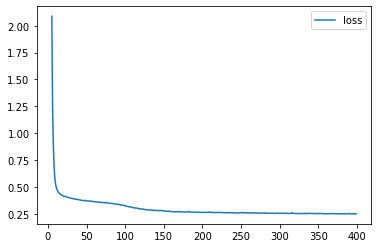

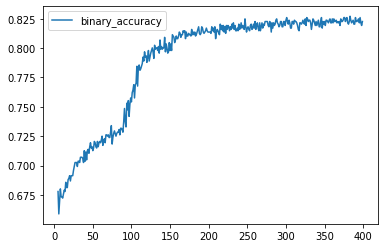

In [184]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss']].plot()
history_df.loc[5:, ['binary_accuracy']].plot()

# print(("\nBest Validation Accuracy: {:0.4f}")\
    #   .format(history_df['val_binary_accuracy'].max()))

In [185]:
eps = 0.4

In [186]:
predictions = model.predict(X_test)
predictions = (predictions > eps) * 1
predictions = predictions.reshape(-1)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [187]:
submission = pd.read_csv("submission.csv")
print(submission)
submission.head()

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
